Saving Airbnb_Open_Data.csv.zip to Airbnb_Open_Data.csv (3).zip
Uploaded files: ['.config', 'Airbnb_Open_Data.csv (1).zip', 'airbnb_data', 'Cleaned_Airbnb_Data.csv', 'Airbnb_Open_Data.csv (2).zip', 'Airbnb_Open_Data.csv.zip', 'Airbnb_Open_Data.csv (3).zip', 'sample_data']
Extracted files: ['Airbnb_Open_Data.csv']

First 5 rows:


/tmp/ipython-input-2069961915.py:26: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("airbnb_data/Airbnb_Open_Data.csv", encoding="latin1")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN



Shape: (102599, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 


/tmp/ipython-input-2069961915.py:46: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])



Missing values after cleaning:
id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64


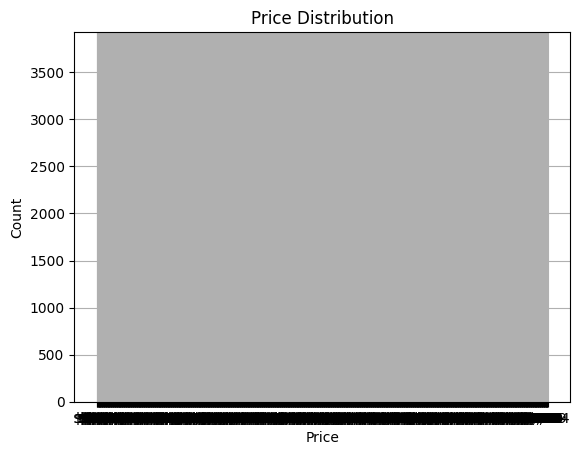

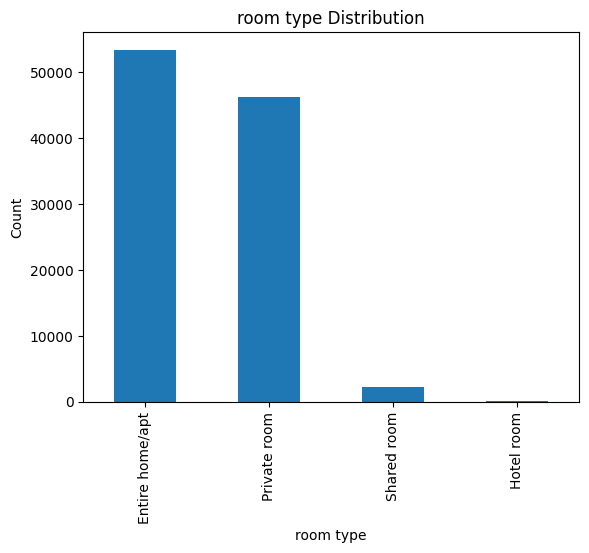

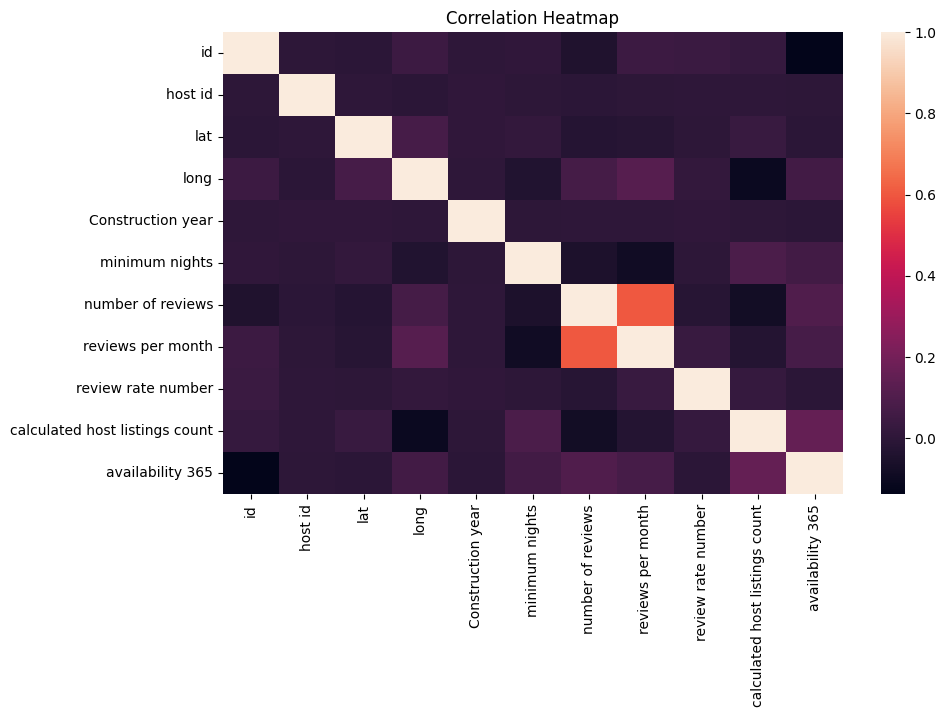


Top 10 Locations:
neighbourhood group
Manhattan        43586
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: count, dtype: int64

PROJECT CONCLUSION:
- Dataset cleaned successfully
- Missing values handled
- Pricing trends analyzed
- Availability impacts pricing
- Useful for Airbnb market analysis



In [5]:
# ============================================
# AIRBNB DATA ANALYSIS PROJECT
# ============================================

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Check uploaded files
print("Uploaded files:", os.listdir())

# Unzip file
zip_path = "Airbnb_Open_Data.csv.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("airbnb_data")

print("Extracted files:", os.listdir("airbnb_data"))

# Load CSV
df = pd.read_csv("airbnb_data/Airbnb_Open_Data.csv", encoding="latin1")

# Display basic info
print("\nFirst 5 rows:")
display(df.head())

print("\nShape:", df.shape)
df.info()

# Show column names (IMPORTANT)
print("\nCOLUMN NAMES:")
print(df.columns)

# Cleaning
df.drop_duplicates(inplace=True)

num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# -------------------------
# EDA VISUALIZATIONS
# -------------------------

# Price Distribution (SAFE)
if 'price' in df.columns:
    plt.figure()
    df['price'].hist(bins=30)
    plt.title("Price Distribution")
    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.show()

# Room type column handling (FIXED)
room_col = None
for col in df.columns:
    if 'room' in col.lower():
        room_col = col
        break

if room_col:
    plt.figure()
    df[room_col].value_counts().plot(kind='bar')
    plt.title(f"{room_col} Distribution")
    plt.xlabel(room_col)
    plt.ylabel("Count")
    plt.show()
else:
    print("Room type column not found in dataset")

# Availability vs Price
if 'availability_365' in df.columns and 'price' in df.columns:
    plt.figure()
    plt.scatter(df['availability_365'], df['price'])
    plt.xlabel("Availability (365)")
    plt.ylabel("Price")
    plt.title("Availability vs Price")
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Top 10 locations (SAFE)
location_col = None
for col in df.columns:
    if 'neigh' in col.lower() or 'location' in col.lower():
        location_col = col
        break

if location_col:
    print("\nTop 10 Locations:")
    print(df[location_col].value_counts().head(10))

# Save cleaned data
df.to_csv("Cleaned_Airbnb_Data.csv", index=False)

print("""
PROJECT CONCLUSION:
- Dataset cleaned successfully
- Missing values handled
- Pricing trends analyzed
- Availability impacts pricing
- Useful for Airbnb market analysis
""")
